In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)


In [9]:
# Display the row's columns and data in dictionary format for Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fbb2ae48d00>,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08}

# Exploratory Precipitation Analysis
##### Design a query to retrieve the last 12 months of precipitation data and plot the results. 
##### Starting from the most recent data point in the database. 

In [10]:
# Find the most recent date in the data set.
last_date_string = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date_string


'2017-08-23'

In [11]:
# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(last_date_string, '%Y-%m-%d')
query_date = dt.date(last_date.year -1, last_date.month, last_date.day)
query_date

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores for the last 12 months
precip_last_12_mo = session.query(Measurement.date,Measurement.prcp
).filter(Measurement.date >= query_date
).all()

precip_last_12_mo

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
# Save the query results as a Pandas DataFrame 
precip_last_12_mo_df = pd.DataFrame(precip_last_12_mo, columns=['Date','Precipitation'])

# View info to determine number of nulls
precip_last_12_mo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2230 non-null   object 
 1   Precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [14]:
# Clean up non value entries
precip_last_12_mo_df = precip_last_12_mo_df.dropna(how='any') 
precip_last_12_mo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2021 non-null   object 
 1   Precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.4+ KB


In [15]:
# Sort the data by date
precip_last_12_mo_df = precip_last_12_mo_df.sort_values(["Date"], ascending=True)

# Set the index to the date column
precip_last_12_mo_df = precip_last_12_mo_df.set_index("Date")

In [16]:
# Preview the dataframe
precip_last_12_mo_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


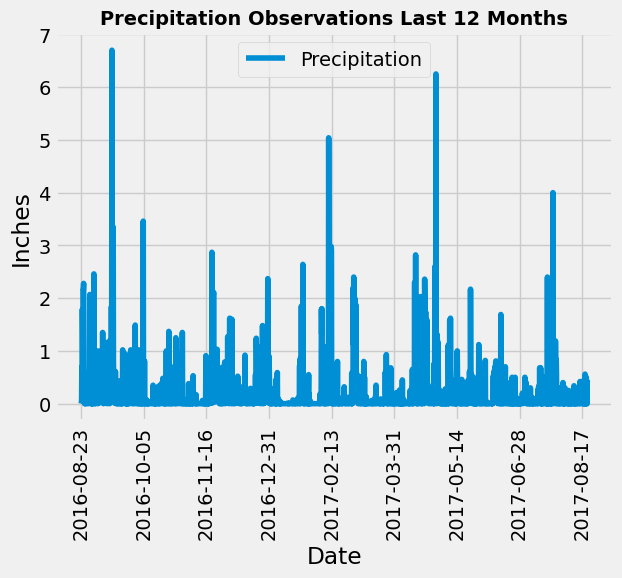

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_last_12_mo_df.plot(rot=90)
plt.ylabel('Inches')
plt.title('Precipitation Observations Last 12 Months', weight='bold', fontsize=14)
plt.savefig("Output/barchart.png")
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stat_agg = precip_last_12_mo_df['Precipitation'].agg(['mean','median', 'var', 'std', 'sem'])
summary_stat_agg


mean      0.177279
median    0.020000
var       0.212696
std       0.461190
sem       0.010259
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
station_count

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_obs = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by((func.count(Measurement.tobs)).desc()).all()

station_obs


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the LOWEST temperature.

station_281_min = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

station_281_min


[('USC00519281', 54.0)]

In [22]:
# Using the most active station id from the previous query, calculate the AVERAGE temperature.

station_281_avg = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

station_281_avg

[('USC00519281', 71.66378066378067)]

In [23]:
# Using the most active station id from the previous query, calculate the HIGHEST temperature.

station_281_max = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

station_281_max

[('USC00519281', 85.0)]

#### Using the most active station id, query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [24]:
# Find the most recent date for temperature measurement for station USC00519281
station_281_last_date_string = session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()[0]

station_281_last_date_string

'2017-08-18'

In [25]:
# Find the most recent date for temperature measurement for station USC00519281
station_281_last_date_string = session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()[0]# Calculate the date one year from the last temp measurement date for station USC00519281
station_281_last_date = dt.datetime.strptime(station_281_last_date_string, '%Y-%m-%d')
station_281_query_date = dt.date(station_281_last_date.year -1, station_281_last_date.month, station_281_last_date.day)

# Perform a query to retrieve the date and temperatures scores for the last 12 months for station USC00519281
station_281_last_12_mo_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= station_281_query_date).all()

station_281_last_12_mo_temps


[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [26]:
# Load the data into a Pandas dataframe
station_281_last_12_mo_temps_df = pd.DataFrame(station_281_last_12_mo_temps)

station_281_last_12_mo_temps_df

,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


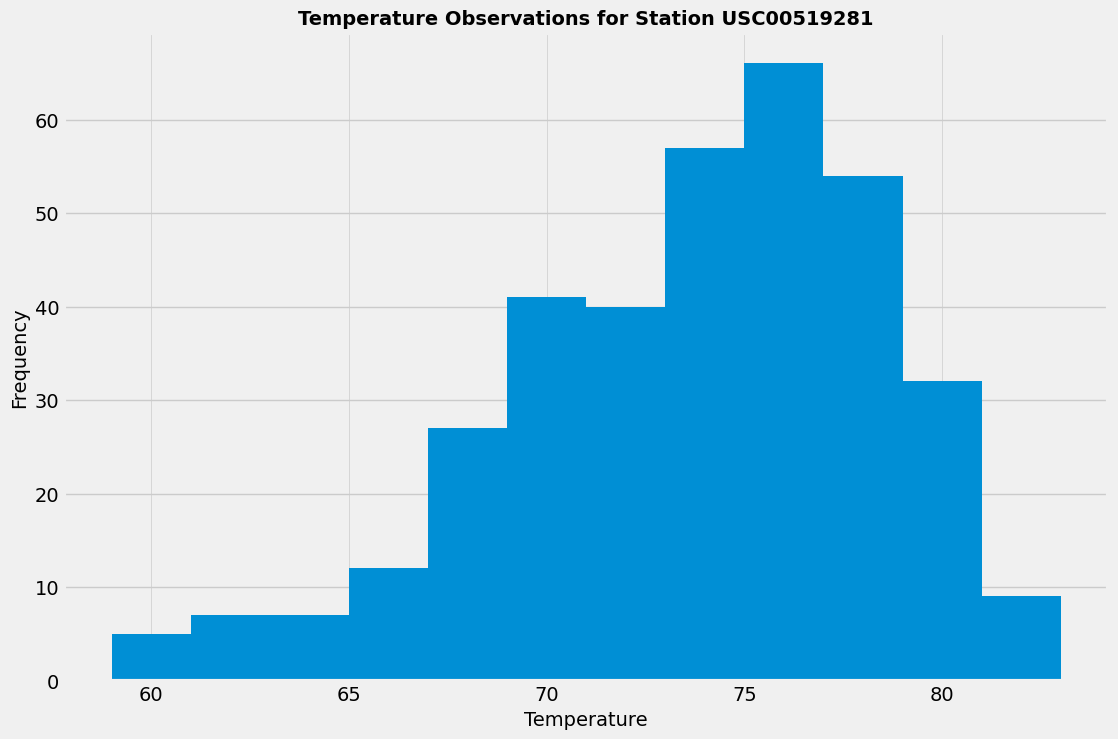

In [27]:
# Create histogram

fig, ax = plt.subplots(figsize=(12,8))

# assigning bins 
bins = ax.hist(station_281_last_12_mo_temps_df['tobs'], bins=12)

# adding gridlines to x-axis
plt.grid(lw = 0.5, axis='x')

# histogram title, x and y labels
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title('Temperature Observations for Station USC00519281', weight='bold', fontsize=14)

plt.savefig("Output/histogram.png")
plt.show()


# Close session

In [28]:
# Close Session
session.close()